In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale 

### Capital Bikeshare Data
https://ride.capitalbikeshare.com/system-data

We deal with data from Jan to Apr in 2022

In [2]:
# read csv files
df_Jan=pd.read_csv('202201-capitalbikeshare-tripdata.csv')
df_Feb=pd.read_csv('202202-capitalbikeshare-tripdata.csv')
df_Mar=pd.read_csv('202203-capitalbikeshare-tripdata.csv')
df_Apr=pd.read_csv('202204-capitalbikeshare-tripdata.csv')

In [3]:
# concat data
df=pd.concat([df_Jan,df_Feb,df_Mar,df_Apr])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 828621 entries, 0 to 310434
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             828621 non-null  object 
 1   rideable_type       828621 non-null  object 
 2   started_at          828621 non-null  object 
 3   ended_at            828621 non-null  object 
 4   start_station_name  792027 non-null  object 
 5   start_station_id    792027 non-null  float64
 6   end_station_name    786251 non-null  object 
 7   end_station_id      786251 non-null  float64
 8   start_lat           828621 non-null  float64
 9   start_lng           828621 non-null  float64
 10  end_lat             827170 non-null  float64
 11  end_lng             827170 non-null  float64
 12  member_casual       828621 non-null  object 
dtypes: float64(6), object(7)
memory usage: 88.5+ MB


In [4]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,1B4445D591115BD9,classic_bike,2022-01-06 18:39:28,2022-01-06 18:43:03,Monroe Ave & Leslie Ave,31087.0,Potomac Ave & Main Line Blvd,31910.0,38.820932,-77.053096,38.822738,-77.049265,member
1,7F4A0E2F03EADEB7,classic_bike,2022-01-31 19:21:22,2022-01-31 19:27:33,14th & L St NW,31283.0,10th & G St NW,31274.0,38.903658,-77.031737,38.898243,-77.026235,member
2,30DD8A84164843AD,classic_bike,2022-01-07 15:28:39,2022-01-07 15:31:01,14th & L St NW,31283.0,12th & L St NW,31251.0,38.903658,-77.031737,38.903819,-77.028400,member
3,FC67665D7682D0A6,classic_bike,2022-01-27 20:09:25,2022-01-27 20:37:02,New York Ave & Hecht Ave NE,31518.0,Nannie Helen Burroughs & Minnesota Ave NE,31704.0,38.915604,-76.983683,38.901385,-76.941877,casual
4,7854F7CC4F631A1E,classic_bike,2022-01-07 16:14:28,2022-01-07 16:16:13,Falls Church City Hall / Park Ave & Little Fal...,32608.0,Pennsylvania Ave & Park Ave,32603.0,38.885434,-77.173605,38.887403,-77.176992,member


### Be careful when dealing with time and date

In [5]:
# Transform time to date ONLY
df['started_at_date'] = pd.to_datetime(df['started_at']).dt.date
df['ended_at_date'] = pd.to_datetime(df['ended_at']).dt.date 

In [6]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_at_date,ended_at_date
0,1B4445D591115BD9,classic_bike,2022-01-06 18:39:28,2022-01-06 18:43:03,Monroe Ave & Leslie Ave,31087.0,Potomac Ave & Main Line Blvd,31910.0,38.820932,-77.053096,38.822738,-77.049265,member,2022-01-06,2022-01-06
1,7F4A0E2F03EADEB7,classic_bike,2022-01-31 19:21:22,2022-01-31 19:27:33,14th & L St NW,31283.0,10th & G St NW,31274.0,38.903658,-77.031737,38.898243,-77.026235,member,2022-01-31,2022-01-31
2,30DD8A84164843AD,classic_bike,2022-01-07 15:28:39,2022-01-07 15:31:01,14th & L St NW,31283.0,12th & L St NW,31251.0,38.903658,-77.031737,38.903819,-77.028400,member,2022-01-07,2022-01-07
3,FC67665D7682D0A6,classic_bike,2022-01-27 20:09:25,2022-01-27 20:37:02,New York Ave & Hecht Ave NE,31518.0,Nannie Helen Burroughs & Minnesota Ave NE,31704.0,38.915604,-76.983683,38.901385,-76.941877,casual,2022-01-27,2022-01-27
4,7854F7CC4F631A1E,classic_bike,2022-01-07 16:14:28,2022-01-07 16:16:13,Falls Church City Hall / Park Ave & Little Fal...,32608.0,Pennsylvania Ave & Park Ave,32603.0,38.885434,-77.173605,38.887403,-77.176992,member,2022-01-07,2022-01-07


## Weather Data

In [7]:
df_weather = pd.read_csv('DC Weather 2022-01-01 to 2022-12-31.csv')

df_weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Washington,DC,USA",2022-01-01,63.5,54.1,58.3,63.5,54.1,58.3,56.0,92.1,...,0.6,0,NaN,2022-01-01T07:26:53,2022-01-01T16:56:53,0.99,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,A..."
1,"Washington,DC,USA",2022-01-02,62.7,47.8,57.5,62.7,42.0,57.0,51.6,81.6,...,1.7,1,NaN,2022-01-02T07:27:00,2022-01-02T16:57:43,1.00,"Rain, Overcast",Cloudy skies throughout the day with rain clea...,rain,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,7..."
2,"Washington,DC,USA",2022-01-03,46.0,26.1,32.7,39.4,14.3,23.0,26.6,78.7,...,0.0,0,NaN,2022-01-03T07:27:05,2022-01-03T16:58:34,0.00,"Snow, Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,snow,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,A..."
3,"Washington,DC,USA",2022-01-04,34.0,25.3,29.4,33.7,16.0,24.0,19.2,65.7,...,5.4,6,NaN,2022-01-04T07:27:07,2022-01-04T16:59:27,0.02,Clear,Clear conditions throughout the day.,snow,"KDCA,72405013743,72403793728,D6279,F0198,KADW,..."
4,"Washington,DC,USA",2022-01-05,40.8,28.1,35.8,37.2,19.8,29.5,29.0,76.3,...,2.2,1,NaN,2022-01-05T07:27:08,2022-01-05T17:00:21,0.05,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,7..."


## Check missing values

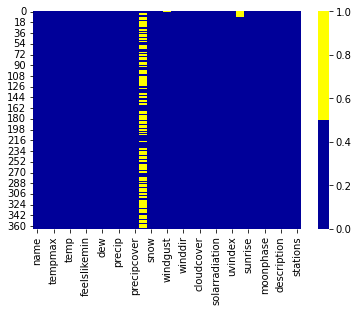

In [8]:
# Date time format 
df_weather['datetime'] = pd.to_datetime(df_weather['datetime']).dt.date


# Use sns heatmap to see whats are the null values.
coln = df_weather.columns[:df_weather.shape[1]]  
colors = ['#000099','#ffff00'] # specify the colors - yellow is missing. blue is not missing.
sns.heatmap(df_weather[coln].isnull(), cmap = sns.color_palette(colors))
plt.show()

### GWU CALENDER DATA

In [9]:
# We decide to add external data called df_calender. 
df_calendar = pd.read_excel('gwu_break.xlsx')

#Transform time to date for consistency
df_calendar['date'] = pd.to_datetime(df_calendar['date']).dt.date
df_calendar.head()

,date,break,weekend(y/n),summer
0,2022-01-01,0,1,0
1,2022-01-02,0,1,0
2,2022-01-03,0,0,0
3,2022-01-04,0,0,0
4,2022-01-05,0,0,0


### Visualize pickups and dropoffs

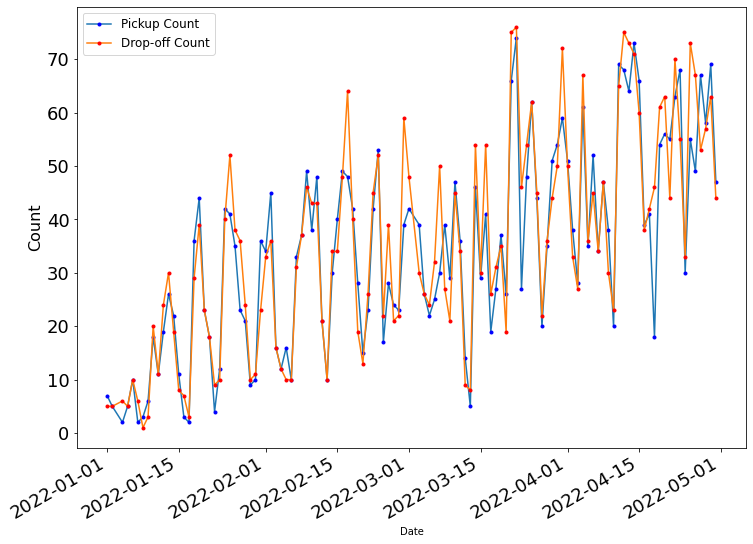

In [10]:
#visualize 21st & I St NW station
df_sub1 = df[df['start_station_name']=="21st & I St NW"]
df_grp1 = df_sub1.groupby(['started_at_date','start_station_name']).size()
df_pu=df_grp1.reset_index(name = "pu_ct")

df_sub2 = df[df['end_station_name']=="21st & I St NW"]
df_grp2 = df_sub2.groupby(['ended_at_date','end_station_name']).size()
df_do=df_grp2.reset_index(name = "do_ct")

fig, ax1 = plt.subplots(figsize=(12, 9))
ax1.plot_date(df_pu['started_at_date'], df_pu['pu_ct'], linestyle='solid', markeredgecolor='blue', markerfacecolor='blue', markersize=3, label='Pickup Count')
ax1.plot_date(df_do['ended_at_date'], df_do['do_ct'], linestyle='solid', markeredgecolor='red', markerfacecolor='red', markersize=3, label='Drop-off Count')
ax1.legend(fontsize=12)



ax1.set_xlabel('Date',fontsize=10)
ax1.set_ylabel('Count',fontsize=16)
plt.gcf().autofmt_xdate()

plt.tick_params(labelsize=18)

plt.show()  


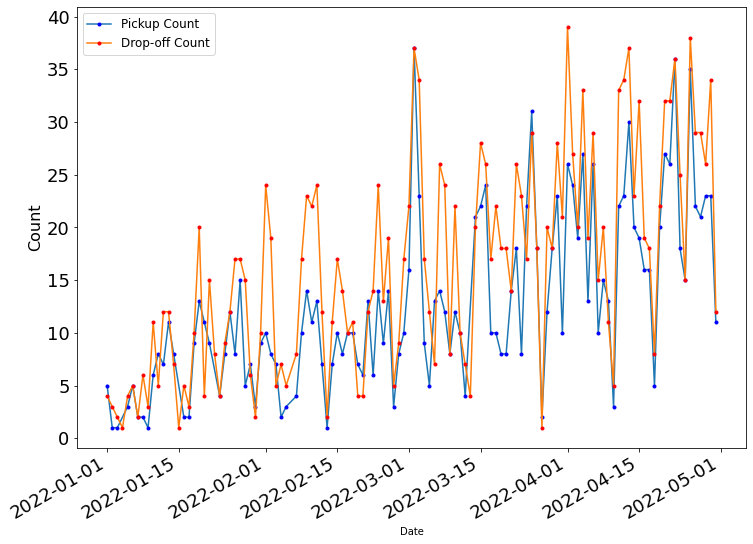

In [11]:
#visualize 21st St & Pennsylvania Ave NW station
df_sub1 = df[df['start_station_name']=="21st St & Pennsylvania Ave NW"]
df_grp1 = df_sub1.groupby(['started_at_date','start_station_name']).size()
df_pu=df_grp1.reset_index(name = "pu_ct")

df_sub2 = df[df['end_station_name']=="21st St & Pennsylvania Ave NW"]
df_grp2 = df_sub2.groupby(['ended_at_date','end_station_name']).size()
df_do=df_grp2.reset_index(name = "do_ct")

fig, ax1 = plt.subplots(figsize=(12, 9))
ax1.plot_date(df_pu['started_at_date'], df_pu['pu_ct'], linestyle='solid', markeredgecolor='blue', markerfacecolor='blue', markersize=3, label='Pickup Count')
ax1.plot_date(df_do['ended_at_date'], df_do['do_ct'], linestyle='solid', markeredgecolor='red', markerfacecolor='red', markersize=3, label='Drop-off Count')
ax1.legend(fontsize=12)

ax1.set_xlabel('Date',fontsize=10)
ax1.set_ylabel('Count',fontsize=16)
plt.gcf().autofmt_xdate()

plt.tick_params(labelsize=18)

plt.show()  


### MERGING ALL DATASETS INTO ONE

 - Since we use three datasets. we decide to merge them into one file called df_final.
 - We decide to created new columns called pick_up_in_day and drop_off_in_day regarding the sunrise and sunset so we can have more specific number of pickup and dropoff

In [12]:
#Merge files into one file. 
df_final = df.merge(df_weather, left_on='started_at_date', right_on='datetime')
df_final = df_final.merge(df_calendar, left_on='started_at_date', right_on='date')

#Have the same time format.
df_final['pick_up_time'] = pd.to_datetime(df_final['started_at']).dt.time
df_final['drop_off_time'] = pd.to_datetime(df_final['ended_at']).dt.time
df_final['sunrise'] = pd.to_datetime(df_final['sunrise']).dt.time
df_final['sunset'] = pd.to_datetime(df_final['sunset']).dt.time

#Generate new two columns
df_final['pick_up_in_day'] = (((df_final['sunrise']) <= (df_final['pick_up_time'])) &
                             ((df_final['pick_up_time']) <= (df_final['sunset']))).astype(int)
df_final['drop_off_in_day'] = (((df_final['sunrise']) <= (df_final['drop_off_time'])) &
                             ((df_final['drop_off_time']) <= (df_final['sunset']))).astype(int)
df_final.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,icon,stations,date,break,weekend(y/n),summer,pick_up_time,drop_off_time,pick_up_in_day,drop_off_in_day
0,1B4445D591115BD9,classic_bike,2022-01-06 18:39:28,2022-01-06 18:43:03,Monroe Ave & Leslie Ave,31087.0,Potomac Ave & Main Line Blvd,31910.0,38.820932,-77.053096,...,snow,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,7...",2022-01-06,0,0,0,18:39:28,18:43:03,0,0
1,2C8807A714B977AB,docked_bike,2022-01-06 11:30:30,2022-01-06 11:52:08,Maine Ave & 7th St SW,31609.0,4th St & Madison Dr NW,31288.0,38.878694,-77.023054,...,snow,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,7...",2022-01-06,0,0,0,11:30:30,11:52:08,1,1
2,A10827AE41FC439D,classic_bike,2022-01-06 18:14:37,2022-01-06 18:40:22,Battery Ln & Trolley Trail,32027.0,Fessenden St & Wisconsin Ave NW,31309.0,38.992375,-77.100104,...,snow,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,7...",2022-01-06,0,0,0,18:14:37,18:40:22,0,0
3,7E031105B95A6F82,classic_bike,2022-01-06 09:20:56,2022-01-06 09:30:56,L'Enfant Plaza / 7th & C St SW,31218.0,14th & D St NW / Ronald Reagan Building,31231.0,38.886266,-77.022241,...,snow,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,7...",2022-01-06,0,0,0,09:20:56,09:30:56,1,1
4,8A646A9CAAA6978A,classic_bike,2022-01-06 10:49:16,2022-01-06 10:56:07,4th St & K St NW,31642.0,3rd & M St NE,31627.0,38.902406,-77.016006,...,snow,"KDCA,72405013743,72403793728,F0198,KADW,KDAA,7...",2022-01-06,0,0,0,10:49:16,10:56:07,1,1


In [13]:
# check the nuill values.
# Since this is the combined file, there are some null values.
# However, we will focus on the specific stations later. 
df_final.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name     36594
start_station_id       36594
end_station_name       42370
end_station_id         42370
start_lat                  0
start_lng                  0
end_lat                 1451
end_lng                 1451
member_casual              0
started_at_date            0
ended_at_date              0
name                       0
datetime                   0
tempmax                    0
tempmin                    0
temp                       0
feelslikemax               0
feelslikemin               0
feelslike                  0
dew                        0
humidity                   0
precip                     0
precipprob                 0
precipcover                0
preciptype            589927
snow                       0
snowdepth                  0
windgust                9035
windspeed                  0
winddir                    0
sealevelpressu

###  '21st & I St NW' and '21st St & Pennsylvania Ave NW' .

### Count daily pickups

In [14]:
# Group and get pickup & drop off occurrence for 21st & I St NW
df_sub = df_final[df_final['start_station_name']=="21st & I St NW"]
df_grp = df_sub.groupby(['started_at_date','start_station_name']).size()
df_pu=df_grp.reset_index(name = "pu_ct")

df_sub1 = df_final[df_final['end_station_name']=="21st & I St NW"]
df_grp1 = df_sub1.groupby(['ended_at_date','end_station_name']).size()
df_pu1 = df_grp1.reset_index(name = "do_ct")

df_sub2 = df_final[df_final['start_station_name']=="21st & I St NW"]
df_sub3 = df_sub2[df_sub2['pick_up_in_day']==1]
df_grp2 = df_sub3.groupby(['started_at_date','start_station_name']).size()
df_pu2 = df_grp2.reset_index(name = "no_pick_up_in_day")

df_sub4 = df_final[df_final['start_station_name']=="21st & I St NW"]
df_sub5 = df_sub4[df_sub2['drop_off_in_day']==1]
df_grp3 = df_sub3.groupby(['started_at_date','start_station_name']).size()
df_pu3 = df_grp3.reset_index(name = "no_drop_off_in_day")

df_sub6 = df_final[df_final['start_station_name']=="21st & I St NW"]
df_sub7 = df_sub6[df_sub2['member_casual']=='member']
df_grp4 = df_sub7.groupby(['started_at_date','start_station_name']).size()
df_pu4 = df_grp4.reset_index(name = "no_member")

merged_df = pd.merge(df_pu, df_pu2, on='started_at_date', how='left')
merged_df = pd.merge(merged_df, df_pu3, on='started_at_date', how='left')
merged_df = merged_df.drop(columns=['start_station_name_x','start_station_name_y'])
merged_df = pd.merge(merged_df, df_pu4, on='started_at_date', how='left')
merged_df = merged_df.drop(columns=['start_station_name_x','start_station_name_y'])
merged_df = merged_df.merge(df_pu1, left_on='started_at_date', right_on='ended_at_date') 
merged_df

,started_at_date,pu_ct,no_pick_up_in_day,no_drop_off_in_day,no_member,ended_at_date,end_station_name,do_ct
0,2022-01-01,7,2.0,2.0,1,2022-01-01,21st & I St NW,5
1,2022-01-02,5,3.0,3.0,4,2022-01-02,21st & I St NW,5
2,2022-01-04,2,1.0,1.0,2,2022-01-04,21st & I St NW,6
3,2022-01-05,5,3.0,3.0,3,2022-01-05,21st & I St NW,5
4,2022-01-06,10,7.0,7.0,8,2022-01-06,21st & I St NW,10
...,...,...,...,...,...,...,...,...
113,2022-04-26,49,42.0,42.0,36,2022-04-26,21st & I St NW,67
114,2022-04-27,67,53.0,53.0,52,2022-04-27,21st & I St NW,53
115,2022-04-28,58,47.0,47.0,47,2022-04-28,21st & I St NW,57
116,2022-04-29,69,57.0,57.0,43,2022-04-29,21st & I St NW,63


In [15]:
# Group and get pickup & drop off occurrence for 21st St & Pennsylvania Ave NW
df_sub_2 = df_final[df_final['start_station_name']=="21st St & Pennsylvania Ave NW"]
df_grp_2 = df_sub_2.groupby(['started_at_date','start_station_name']).size()
df_pu_2 = df_grp_2.reset_index(name = "pu_ct")

df_sub1_2 = df_final[df_final['end_station_name']=="21st St & Pennsylvania Ave NW"]
df_grp1_2 = df_sub1_2.groupby(['ended_at_date','end_station_name']).size()
df_pu1_2 = df_grp1_2.reset_index(name = "do_ct")

df_sub2_2 = df_final[df_final['start_station_name']=="21st St & Pennsylvania Ave NW"]
df_sub3_2 = df_sub2_2[df_sub2_2['pick_up_in_day']==1]
df_grp2_2 = df_sub3_2.groupby(['started_at_date','start_station_name']).size()
df_pu2_2 = df_grp2_2.reset_index(name = "no_pick_up_in_day")

df_sub4_2 = df_final[df_final['start_station_name']=="21st St & Pennsylvania Ave NW"]
df_sub5_2 = df_sub4_2[df_sub2_2['drop_off_in_day']==1]
df_grp3_2 = df_sub3_2.groupby(['started_at_date','start_station_name']).size()
df_pu3_2 = df_grp3_2.reset_index(name = "no_drop_off_in_day")

df_sub6_2 = df_final[df_final['start_station_name']=="21st St & Pennsylvania Ave NW"]
df_sub7_2 = df_sub6_2[df_sub2_2['member_casual']=='member']
df_grp4_2 = df_sub7_2.groupby(['started_at_date','start_station_name']).size()
df_pu4_2 = df_grp4_2.reset_index(name = "no_member")

merged_df_2 = pd.merge(df_pu_2, df_pu2_2, on='started_at_date', how='left')
merged_df_2 = pd.merge(merged_df_2, df_pu3_2, on='started_at_date', how='left')
merged_df_2 = merged_df_2.drop(columns=['start_station_name_x','start_station_name_y'])
merged_df_2 = pd.merge(merged_df_2, df_pu4_2, on='started_at_date', how='left')
merged_df_2 = merged_df_2.drop(columns=['start_station_name_x','start_station_name_y'])
merged_df_2 = merged_df_2.merge(df_pu1_2, left_on='started_at_date', right_on='ended_at_date') 
merged_df_2

,started_at_date,pu_ct,no_pick_up_in_day,no_drop_off_in_day,no_member,ended_at_date,end_station_name,do_ct
0,2022-01-01,5,1.0,1.0,1.0,2022-01-01,21st St & Pennsylvania Ave NW,4
1,2022-01-02,1,1.0,1.0,NaN,2022-01-02,21st St & Pennsylvania Ave NW,3
2,2022-01-03,1,1.0,1.0,NaN,2022-01-03,21st St & Pennsylvania Ave NW,2
3,2022-01-05,3,3.0,3.0,3.0,2022-01-05,21st St & Pennsylvania Ave NW,4
4,2022-01-06,5,5.0,5.0,3.0,2022-01-06,21st St & Pennsylvania Ave NW,5
...,...,...,...,...,...,...,...,...
110,2022-04-26,22,22.0,22.0,15.0,2022-04-26,21st St & Pennsylvania Ave NW,29
111,2022-04-27,21,20.0,20.0,18.0,2022-04-27,21st St & Pennsylvania Ave NW,29
112,2022-04-28,23,18.0,18.0,21.0,2022-04-28,21st St & Pennsylvania Ave NW,26
113,2022-04-29,23,18.0,18.0,18.0,2022-04-29,21st St & Pennsylvania Ave NW,34


## Retain variables of your choice

In [16]:
cols_to_keep = [
 'datetime'
,'break'
,'weekend(y/n)'
,'summer'
,'tempmax'
,'tempmin'
,'temp'
,'feelslikemax'
,'feelslikemin'
,'feelslike'
,'dew'
,'humidity'
,'precip'
,'precipprob'
,'precipcover'
,'snow'
,'snowdepth'
,'windspeed'
,'winddir'
,'sealevelpressure'
,'cloudcover'
,'visibility'
,'solarradiation'
,'solarenergy'
,'uvindex'
,'moonphase'
,'icon'

               ]

#Specify what kind of variables are used in predictions.
df_final2 = df_final[cols_to_keep]
df_final2

,datetime,break,weekend(y/n),summer,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon
0,2022-01-06,0,0,0,42.9,36.9,39.8,40.6,29.5,35.3,...,12.9,16.0,1012.7,88.1,9.9,145.6,5.3,4,0.09,snow
1,2022-01-06,0,0,0,42.9,36.9,39.8,40.6,29.5,35.3,...,12.9,16.0,1012.7,88.1,9.9,145.6,5.3,4,0.09,snow
2,2022-01-06,0,0,0,42.9,36.9,39.8,40.6,29.5,35.3,...,12.9,16.0,1012.7,88.1,9.9,145.6,5.3,4,0.09,snow
3,2022-01-06,0,0,0,42.9,36.9,39.8,40.6,29.5,35.3,...,12.9,16.0,1012.7,88.1,9.9,145.6,5.3,4,0.09,snow
4,2022-01-06,0,0,0,42.9,36.9,39.8,40.6,29.5,35.3,...,12.9,16.0,1012.7,88.1,9.9,145.6,5.3,4,0.09,snow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
828616,2022-04-04,0,0,0,55.8,38.5,48.6,55.8,33.0,46.3,...,14.0,305.3,1017.8,53.7,9.9,106.8,9.1,4,0.05,partly-cloudy-day
828617,2022-04-04,0,0,0,55.8,38.5,48.6,55.8,33.0,46.3,...,14.0,305.3,1017.8,53.7,9.9,106.8,9.1,4,0.05,partly-cloudy-day
828618,2022-04-04,0,0,0,55.8,38.5,48.6,55.8,33.0,46.3,...,14.0,305.3,1017.8,53.7,9.9,106.8,9.1,4,0.05,partly-cloudy-day
828619,2022-04-04,0,0,0,55.8,38.5,48.6,55.8,33.0,46.3,...,14.0,305.3,1017.8,53.7,9.9,106.8,9.1,4,0.05,partly-cloudy-day


In [17]:
# Delete the duplicated values.
df_final2 = df_final2.drop_duplicates()

## Prepare X and y: Merge the combined data with selected variables for the prediction

In [18]:
# Merge them together and remove dates and station name for 21st & I St NW

df_m_1 = merged_df.merge(df_final2, left_on='started_at_date', right_on='datetime')
df_m_1 = df_m_1.drop(columns=['started_at_date','datetime','ended_at_date','end_station_name'])
df_m_1.dropna(inplace=True)
df_m_1

,pu_ct,no_pick_up_in_day,no_drop_off_in_day,no_member,do_ct,break,weekend(y/n),summer,tempmax,tempmin,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon
0,7,2.0,2.0,1,5,0,1,0,63.5,54.1,...,11.4,190.2,1007.2,99.5,6.2,21.4,0.6,0,0.99,rain
1,5,3.0,3.0,4,5,0,1,0,62.7,47.8,...,18.9,290.7,1006.6,91.6,9.6,47.3,1.7,1,1.00,rain
2,2,1.0,1.0,2,6,0,0,0,34.0,25.3,...,14.1,192.1,1029.7,18.7,9.9,153.2,5.4,6,0.02,snow
3,5,3.0,3.0,3,5,0,0,0,40.8,28.1,...,13.6,195.2,1014.5,82.6,9.9,63.5,2.2,1,0.05,partly-cloudy-day
4,10,7.0,7.0,8,10,0,0,0,42.9,36.9,...,12.9,16.0,1012.7,88.1,9.9,145.6,5.3,4,0.09,snow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,49,42.0,42.0,36,67,0,0,0,70.9,57.8,...,17.2,357.7,1017.4,95.9,8.3,44.5,3.8,2,0.91,rain
114,67,53.0,53.0,52,53,0,0,0,61.8,46.8,...,21.0,315.0,1018.7,53.8,9.9,130.1,11.3,9,0.95,partly-cloudy-day
115,58,47.0,47.0,47,57,0,0,0,60.0,38.7,...,17.7,326.1,1021.9,49.6,9.9,130.5,11.3,10,0.98,partly-cloudy-day
116,69,57.0,57.0,43,63,0,0,0,65.8,42.9,...,10.3,323.7,1022.2,33.2,9.9,129.7,11.2,10,1.00,partly-cloudy-day


In [19]:
# Merge them together and remove dates and station name for  21st St & Pennsylvania Ave NW

df_m_2 = merged_df_2.merge(df_final2, left_on='started_at_date', right_on='datetime')
df_m_2 = df_m_2.drop(columns=['started_at_date','datetime','ended_at_date','end_station_name'])
df_m_2.dropna(inplace=True)
df_m_2

,pu_ct,no_pick_up_in_day,no_drop_off_in_day,no_member,do_ct,break,weekend(y/n),summer,tempmax,tempmin,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon
0,5,1.0,1.0,1.0,4,0,1,0,63.5,54.1,...,11.4,190.2,1007.2,99.5,6.2,21.4,0.6,0,0.99,rain
3,3,3.0,3.0,3.0,4,0,0,0,40.8,28.1,...,13.6,195.2,1014.5,82.6,9.9,63.5,2.2,1,0.05,partly-cloudy-day
4,5,5.0,5.0,3.0,5,0,0,0,42.9,36.9,...,12.9,16.0,1012.7,88.1,9.9,145.6,5.3,4,0.09,snow
5,2,1.0,1.0,2.0,2,0,0,0,35.8,24.9,...,21.3,313.3,1018.6,58.4,8.4,180.5,6.7,5,0.14,snow
8,6,4.0,4.0,4.0,11,0,0,0,44.0,28.9,...,21.0,315.6,1023.8,58.5,9.9,107.3,6.2,5,0.28,snow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,22,22.0,22.0,15.0,29,0,0,0,70.9,57.8,...,17.2,357.7,1017.4,95.9,8.3,44.5,3.8,2,0.91,rain
111,21,20.0,20.0,18.0,29,0,0,0,61.8,46.8,...,21.0,315.0,1018.7,53.8,9.9,130.1,11.3,9,0.95,partly-cloudy-day
112,23,18.0,18.0,21.0,26,0,0,0,60.0,38.7,...,17.7,326.1,1021.9,49.6,9.9,130.5,11.3,10,0.98,partly-cloudy-day
113,23,18.0,18.0,18.0,34,0,0,0,65.8,42.9,...,10.3,323.7,1022.2,33.2,9.9,129.7,11.2,10,1.00,partly-cloudy-day


# train linear models

### import basic model for training

In [20]:
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [22]:
# pickup 21st & I St NW
y = df_m_1['pu_ct']
X = df_m_1.drop('pu_ct',axis=1)
X = pd.get_dummies(data=X, drop_first=True)

In [23]:
#train to predict for demand in 21st & I St NW
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 200)

In [24]:
# pickup 21st St & Pennsylvania Ave NW station
y2 = df_m_2['pu_ct']
X2 = df_m_2.drop('pu_ct',axis=1)
X2 = pd.get_dummies(data=X2, drop_first=True)

In [25]:
#train to predict for demand in 21st St & Pennsylvania Ave NW station
X2_train,X2_test, y2_train,y2_test = train_test_split(X2,y2, test_size=0.4, random_state = 200)

In [26]:
# drop off 21st & I St NW
y3 = df_m_1['do_ct']
X3 = df_m_1.drop('do_ct',axis=1)
X3 = pd.get_dummies(data=X3, drop_first=True)

In [27]:
#train to predict for demand in 21st & I St NW
X3_train,X3_test, y3_train,y3_test = train_test_split(X3,y3, test_size=0.4, random_state = 200)

In [28]:
# drop off 21st St & Pennsylvania Ave NW station
y4 = df_m_2['do_ct']
X4 = df_m_2.drop('do_ct',axis=1)
X4 = pd.get_dummies(data=X4, drop_first=True)

In [29]:
#train to predict for demand in 21st St & Pennsylvania Ave NW station
X4_train,X4_test, y4_train,y4_test = train_test_split(X4,y4, test_size=0.4, random_state = 200)

## Linear Regression to predict for demand of pickup in 21st & I St NW 

In [30]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train) 
y_pred = linear_regressor.predict(X_test)

In [31]:
print(pd.Series(linear_regressor.coef_.flatten(), index=X_train.columns))

no_pick_up_in_day         2.623010e-01
no_drop_off_in_day        2.623010e-01
no_member                 6.353071e-01
do_ct                     4.756670e-03
break                    -3.743652e+00
weekend(y/n)              3.119217e+00
summer                    1.604550e-13
tempmax                   4.454660e-01
tempmin                   9.074295e-01
temp                     -1.691734e+00
feelslikemax             -8.873244e-02
feelslikemin             -7.523948e-01
feelslike                -5.495141e-01
dew                       2.443108e+00
humidity                 -1.292803e+00
precip                   -5.051357e+00
precipprob               -2.794728e-02
precipcover               8.865194e-02
snow                     -3.291331e+00
snowdepth                 1.527312e+00
windspeed                -7.350461e-01
winddir                   6.668108e-03
sealevelpressure         -1.685471e-01
cloudcover                2.194197e-04
visibility               -1.925912e+00
solarradiation           

In [32]:
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 33.363


## LASSO

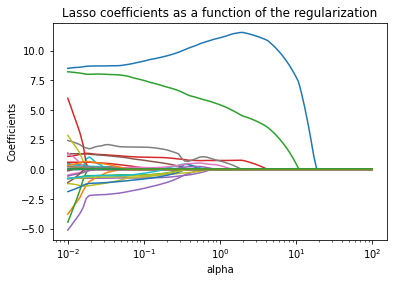

In [33]:
alphas = 10**np.linspace(-2,2,100)

lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a, max_iter=10000) # increase iterations for optimization of coefficients
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
# plt.legend(list(X_train.columns), loc='best')

plt.title('Lasso coefficients as a function of the regularization');

In [34]:
# find the best alpha via CV with selected scoring metric
lassocv = LassoCV(alphas=alphas, max_iter=10000)
lassocv.fit(scale(X_train), y_train)

print('The best alpha from LassoCV:', lassocv.alpha_)

The best alpha from LassoCV: 0.7220809018385468


In [35]:
# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)
print('The coefficients are:')
print(pd.Series(lasso.coef_.flatten(), index=X_train.columns))

The coefficients are:
no_pick_up_in_day         10.823031
no_drop_off_in_day         0.000000
no_member                  5.743458
do_ct                      0.753977
break                     -0.059063
weekend(y/n)               0.000000
summer                     0.000000
tempmax                    0.971371
tempmin                    0.000000
temp                       0.000000
feelslikemax               0.000000
feelslikemin               0.000000
feelslike                  0.000000
dew                        0.000000
humidity                  -0.000000
precip                    -0.000000
precipprob                -0.000000
precipcover               -0.000000
snow                      -0.017019
snowdepth                 -0.000000
windspeed                 -0.000000
winddir                    0.000000
sealevelpressure          -0.000000
cloudcover                -0.000000
visibility                 0.127384
solarradiation             0.000000
solarenergy                0.434163
uvinde

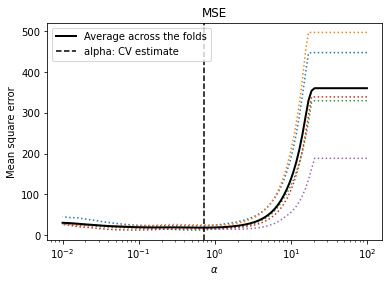

In [36]:
plt.semilogx(lassocv.alphas_, lassocv.mse_path_, linestyle=":")
plt.plot(
    lassocv.alphas_,
    lassocv.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lassocv.alpha_, linestyle="--", color="black", label="alpha: CV estimate")


plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
plt.title("MSE")
plt.show()

In [37]:
y_pred=lasso.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 24.555


In [38]:
#Print out the predicted Values from the model
pred=lasso.predict(scale(X.values))
print(pred)

[ 4.51373119  6.85080265  2.92781791  4.98228641 10.44138694  5.24930001
 19.82705678 10.78639262 21.0790552  20.89775326 19.93025043 10.2995872
  4.36623085 35.73429781 40.39661401 25.40889549 14.80333036  5.98259478
 12.1708567  37.91789934 38.46253041 31.31523788 24.67878147 24.61337702
  9.5885199   9.6790936  31.25313625 31.23837878 36.64904055 14.15528552
 10.3033384  14.75148977 12.68751686 32.5477589  37.55172484 42.49187582
 34.33915442 44.01194987 21.30149977  8.1844171  27.46170444 38.17936839
 43.94335791 42.08119709 38.60210011 23.24273994 13.44484858 22.70933164
 39.34728242 49.98273785 18.01459631 29.39380524 24.12493338 21.40219276
 38.68535455 38.30167464 34.88194448 23.64725335 19.88958295 21.77167016
 32.22089384 33.56417166 19.67065488 48.33939755 32.12332099  7.85619808
  7.28448789 47.44542886 34.39749529 40.30919982 17.90202423 24.25267902
 36.04447825 25.39018901 69.90261565 66.43505673 27.95056174 50.69527596
 56.45302851 38.98116904 18.1782142  39.94047183 50.

## Ridge Regression 

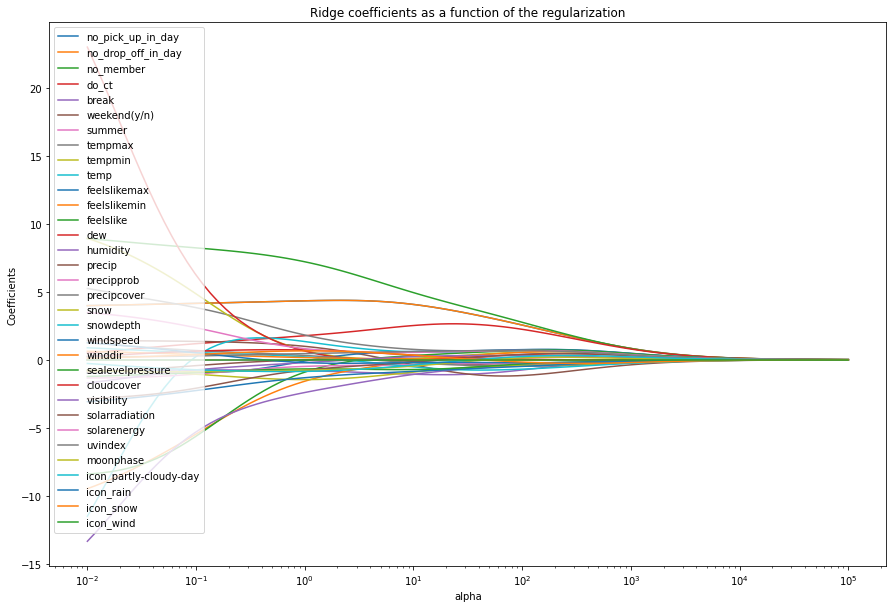

In [39]:
alphas = 10**np.linspace(-2,5,100)

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X_train), y_train)
    coefs.append(ridge.coef_)

plt.figure(figsize=(15, 10)) 
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.legend(list(X.columns), loc='best')

plt.title('Ridge coefficients as a function of the regularization');

###  Use Cross-validation for best Alpha

In [40]:
# find the best alpha via CV with selected scoring metric
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train), y_train)

print('The best alpha from RidgeCV:', ridgecv.alpha_)

The best alpha from RidgeCV: 4.862601580065354


In [41]:
# with the best alpha
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(scale(X_train), y_train)
print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))

The coefficients are:
no_pick_up_in_day         4.297428
no_drop_off_in_day        4.297428
no_member                 5.709814
do_ct                     2.282500
break                    -0.974779
weekend(y/n)              0.154851
summer                    0.000000
tempmax                   0.964516
tempmin                   0.062289
temp                      0.710336
feelslikemax              0.540301
feelslikemin             -0.435579
feelslike                 0.135847
dew                      -0.012254
humidity                 -1.438666
precip                   -0.013456
precipprob               -0.394712
precipcover              -0.046324
snow                     -1.161730
snowdepth                -0.262443
windspeed                -0.966431
winddir                   0.084115
sealevelpressure         -0.711644
cloudcover                0.493498
visibility                0.111807
solarradiation           -0.345388
solarenergy               0.535264
uvindex                   0.56283

In [42]:
y_pred=ridge.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 26.692


## Elastic Net 

In [43]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

ENcv = ElasticNetCV(alphas=None, cv=10, max_iter=10000) # default l1_ratio=0.5
ENcv.fit(scale(X_train), y_train)

print('The best alpha from ElasticNetCV:', ENcv.alpha_)

# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)


EN=ElasticNet()
EN.set_params(alpha=ENcv.alpha_)
EN.fit(scale(X_train), y_train)

print('The coefficients are:')
print(pd.Series(EN.coef_.flatten(), index=X_train.columns))

The best alpha from ElasticNetCV: 0.16902685882423749
The coefficients are:
no_pick_up_in_day         4.340643
no_drop_off_in_day        4.340643
no_member                 5.561713
do_ct                     2.194431
break                    -0.941190
weekend(y/n)              0.000000
summer                    0.000000
tempmax                   0.784858
tempmin                   0.000000
temp                      0.493447
feelslikemax              0.579852
feelslikemin              0.000000
feelslike                 0.096416
dew                       0.000000
humidity                 -1.059115
precip                   -0.000000
precipprob               -0.000000
precipcover              -0.000000
snow                     -0.532022
snowdepth                -0.180261
windspeed                -0.705744
winddir                   0.000000
sealevelpressure         -0.545108
cloudcover                0.004525
visibility                0.231806
solarradiation            0.000000
solarenergy   

In [44]:
y_pred = EN.predict(scale(X_test.values))
mse = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE is {mse}")

MSE is 26.26


Based on the result, it is better to use linear regression from lasso.

## Linear Regression to predict for demand of pickup in 21st St & Pennsylvania Ave NW station

In [45]:
linear_regressor = LinearRegression()
linear_regressor.fit(X2_train, y2_train) 
y_pred1 = linear_regressor.predict(X2_test)

In [46]:
print(pd.Series(linear_regressor.coef_.flatten(), index=X2_train.columns))

no_pick_up_in_day         3.689616e-01
no_drop_off_in_day        3.689616e-01
no_member                 3.746299e-01
do_ct                     1.479641e-01
break                    -4.851675e-14
weekend(y/n)              2.494359e+00
summer                   -5.573320e-14
tempmax                   6.018883e-02
tempmin                  -5.883158e-01
temp                      4.766742e-01
feelslikemax             -2.132422e-01
feelslikemin              3.744760e-01
feelslike                -3.249262e-01
dew                       1.819942e-01
humidity                 -7.797674e-02
precip                    3.652322e+00
precipprob                1.865428e-02
precipcover              -9.942769e-04
snow                     -1.531202e+00
snowdepth                -1.561050e-01
windspeed                -2.418519e-01
winddir                   5.802401e-03
sealevelpressure         -6.411286e-02
cloudcover                2.573655e-03
visibility               -8.114322e-03
solarradiation           

In [47]:
mse = round(mean_squared_error(y2_test, y_pred1),3)
print(f"MSE is {mse}")

MSE is 5.871


In [48]:
pred2=linear_regressor.predict(X2)
print(pred2)

[ 4.8432976   2.77398548  1.04952588  2.42727992  5.28697572  5.3923765
  4.58367226 10.68186622  4.71862764  6.76758792  2.13144952  8.58237328
 12.49966279  8.96946396  8.6680056   6.70045609  7.82616736 10.21007241
  9.83555264 19.01421378  5.37395953  8.86821666  3.72267502  8.58512411
 10.10982759  9.04036896  5.111362    3.08668358  5.61936265  3.72400251
 11.55251132 13.78917231 11.47013244 12.69566429  7.43927827  3.92446405
  7.59743998 12.95313267  6.11999517  6.51336576  5.46587924  2.10414188
  6.21082769 10.99614715  3.54366268 15.02562047  7.77757962 12.58809303
  8.91322074  9.41242656 16.47504869 32.1399565  23.88524899  8.42573576
  5.54666884 10.79395313 13.71402631 12.7689977   7.95184892 12.63981145
 10.45442272  3.91178484 21.08045432 17.74748277 24.87028702 11.29754609
 11.43719588  7.78003829  7.08921668 14.74528727 19.33774633  9.47792999
 24.12910042 30.18643852 17.06438811 14.19573896 19.67012683 23.54629012
  7.7464833  25.61263827 21.29420152 14.87020134 29.

## LASSO

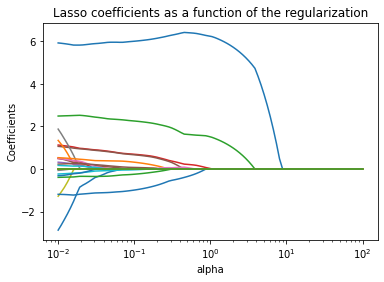

In [49]:
alphas = 10**np.linspace(-2,2,100)

lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a, max_iter=10000) # increase iterations for optimization of coefficients
    lasso.fit(scale(X2_train), y2_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
# plt.legend(list(X_train.columns), loc='best')

plt.title('Lasso coefficients as a function of the regularization');

In [50]:
# find the best alpha via CV with selected scoring metric
lassocv = LassoCV(alphas=alphas, max_iter=10000)
lassocv.fit(scale(X2_train), y2_train)

print('The best alpha from LassoCV:', lassocv.alpha_)

The best alpha from LassoCV: 0.11233240329780277


In [51]:
# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X2_train), y2_train)
print('The coefficients are:')
print(pd.Series(lasso.coef_.flatten(), index=X2_train.columns))

The coefficients are:
no_pick_up_in_day         6.027135e+00
no_drop_off_in_day        7.382812e-14
no_member                 2.240717e+00
do_ct                     6.780526e-01
break                     0.000000e+00
weekend(y/n)              6.508965e-01
summer                    0.000000e+00
tempmax                   0.000000e+00
tempmin                   0.000000e+00
temp                      0.000000e+00
feelslikemax             -0.000000e+00
feelslikemin              0.000000e+00
feelslike                 0.000000e+00
dew                       0.000000e+00
humidity                 -0.000000e+00
precip                    0.000000e+00
precipprob                0.000000e+00
precipcover               0.000000e+00
snow                     -0.000000e+00
snowdepth                -2.835076e-02
windspeed                -9.621145e-01
winddir                   2.989387e-01
sealevelpressure         -2.300681e-01
cloudcover                0.000000e+00
visibility               -0.000000e+00
sol

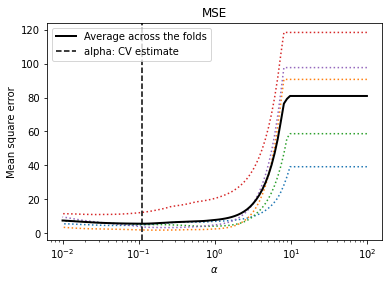

In [52]:
plt.semilogx(lassocv.alphas_, lassocv.mse_path_, linestyle=":")
plt.plot(
    lassocv.alphas_,
    lassocv.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lassocv.alpha_, linestyle="--", color="black", label="alpha: CV estimate")


plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
plt.title("MSE")
plt.show()

In [53]:
y_pred1=lasso.predict(scale(X2_test.values))
mse = round(mean_squared_error(y2_test, y_pred1),3)
print(f"MSE is {mse}")

MSE is 13.372


## Ridge Regression 

Text(0.5, 1.0, 'Ridge coefficients as a function of the regularization')

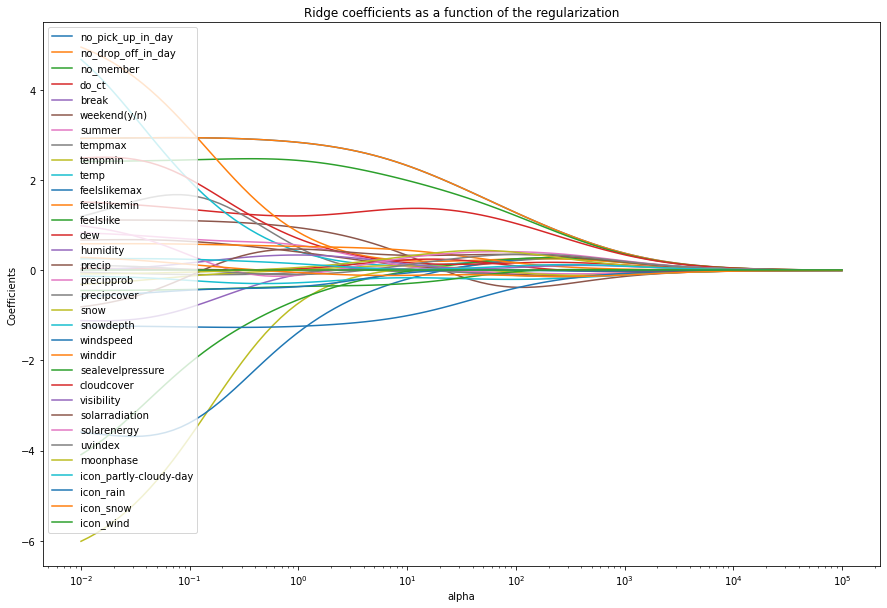

In [54]:
alphas = 10**np.linspace(-2,5,100)

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X2_train), y2_train)
    coefs.append(ridge.coef_)

plt.figure(figsize=(15, 10)) 
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.legend(list(X.columns), loc='best')

plt.title('Ridge coefficients as a function of the regularization')

In [55]:
# find the best alpha via CV with selected scoring metric
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X2_train), y2_train)

print('The best alpha from RidgeCV:', ridgecv.alpha_)

The best alpha from RidgeCV: 5.722367659350215


In [56]:
# with the best alpha
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(scale(X2_train), y2_train)
print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X2_train.columns))

The coefficients are:
no_pick_up_in_day         2.510578
no_drop_off_in_day        2.510578
no_member                 2.138943
do_ct                     1.339549
break                     0.000000
weekend(y/n)              0.542659
summer                    0.000000
tempmax                  -0.008684
tempmin                  -0.035730
temp                      0.117675
feelslikemax             -0.382481
feelslikemin              0.266086
feelslike                -0.126658
dew                       0.236901
humidity                  0.044323
precip                    0.168499
precipprob                0.188995
precipcover               0.031597
snow                      0.098704
snowdepth                -0.174674
windspeed                -1.099308
winddir                   0.480365
sealevelpressure         -0.322278
cloudcover                0.191276
visibility                0.209402
solarradiation            0.354097
solarenergy               0.191456
uvindex                   0.04437

In [57]:
y_pred1=ridge.predict(scale(X2_test.values))
mse = round(mean_squared_error(y2_test, y_pred1),3)
print(f"MSE is {mse}")

MSE is 12.462


## Elastic Net

In [58]:
ENcv = ElasticNetCV(alphas=None, cv=10, max_iter=10000) # default l1_ratio=0.5
ENcv.fit(scale(X2_train), y2_train)

print('The best alpha from ElasticNetCV:', ENcv.alpha_)

# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X2_train), y2_train)


EN=ElasticNet()
EN.set_params(alpha=ENcv.alpha_)
EN.fit(scale(X2_train), y2_train)

print('The coefficients are:')
print(pd.Series(EN.coef_.flatten(), index=X2_train.columns))

The best alpha from ElasticNetCV: 0.11303721546444077
The coefficients are:
no_pick_up_in_day         2.682385
no_drop_off_in_day        2.679267
no_member                 2.130051
do_ct                     1.136078
break                     0.000000
weekend(y/n)              0.545954
summer                    0.000000
tempmax                   0.000000
tempmin                   0.000000
temp                      0.000000
feelslikemax             -0.000000
feelslikemin              0.104979
feelslike                 0.000000
dew                       0.000000
humidity                 -0.000000
precip                    0.031491
precipprob                0.000000
precipcover               0.000000
snow                     -0.000000
snowdepth                -0.099956
windspeed                -1.009419
winddir                   0.376483
sealevelpressure         -0.293121
cloudcover                0.061017
visibility                0.000000
solarradiation            0.278635
solarenergy   

In [59]:
y_pred1 = EN.predict(scale(X2_test.values))
mse = round(mean_squared_error(y2_test, y_pred1),3)
print(f"MSE is {mse}")

MSE is 12.656


Based on the result of MSE, it is better to use simple linear regression. However, we need to check the coefficients and check if they are significant.

## Linear Regression to predict for demand of dropoff in 21st & I St NW

In [60]:
linear_regressor = LinearRegression()
linear_regressor.fit(X3_train, y3_train) 
y_pred2 = linear_regressor.predict(X3_test)

In [61]:
print(pd.Series(linear_regressor.coef_.flatten(), index=X3_train.columns))

pu_ct                     1.606337e-02
no_pick_up_in_day         1.865833e-01
no_drop_off_in_day        1.865833e-01
no_member                 4.824301e-01
break                    -8.187825e+00
weekend(y/n)             -7.527971e+00
summer                    1.020573e-12
tempmax                   7.531400e-01
tempmin                  -1.396681e-01
temp                     -4.776846e+00
feelslikemax             -5.283586e-01
feelslikemin             -1.614597e-01
feelslike                -3.942578e-01
dew                       6.186940e+00
humidity                 -2.767486e+00
precip                    1.051327e+01
precipprob                5.195360e-02
precipcover              -9.717681e-02
snow                      3.161216e+01
snowdepth                 2.792138e+00
windspeed                -6.886945e-01
winddir                   8.335319e-04
sealevelpressure         -2.130885e-01
cloudcover               -1.290196e-01
visibility               -1.306974e+00
solarradiation           

In [62]:
mse = round(mean_squared_error(y3_test, y_pred2),3)
print(f"MSE is {mse}")

MSE is 281.512


## LASSO

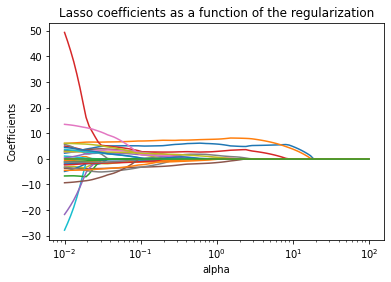

In [63]:
alphas = 10**np.linspace(-2,2,100)

lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a, max_iter=10000) # increase iterations for optimization of coefficients
    lasso.fit(scale(X3_train), y3_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
# plt.legend(list(X_train.columns), loc='best')

plt.title('Lasso coefficients as a function of the regularization');

In [64]:
# find the best alpha via CV with selected scoring metric
lassocv = LassoCV(alphas=alphas, max_iter=10000)
lassocv.fit(scale(X3_train), y3_train)

print('The best alpha from LassoCV:', lassocv.alpha_)

The best alpha from LassoCV: 0.7924828983539177


In [65]:
# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X3_train), y3_train)
print('The coefficients are:')
print(pd.Series(lasso.coef_.flatten(), index=X3_train.columns))

The coefficients are:
pu_ct                     5.961799e+00
no_pick_up_in_day         7.602717e+00
no_drop_off_in_day        2.368476e-15
no_member                 2.722134e+00
break                    -0.000000e+00
weekend(y/n)             -1.690960e+00
summer                    0.000000e+00
tempmax                   1.628391e+00
tempmin                   0.000000e+00
temp                      0.000000e+00
feelslikemax              0.000000e+00
feelslikemin              0.000000e+00
feelslike                 0.000000e+00
dew                       1.017877e-01
humidity                  0.000000e+00
precip                    0.000000e+00
precipprob                0.000000e+00
precipcover              -0.000000e+00
snow                     -0.000000e+00
snowdepth                -0.000000e+00
windspeed                -0.000000e+00
winddir                  -4.269716e-01
sealevelpressure          0.000000e+00
cloudcover               -0.000000e+00
visibility                0.000000e+00
sol

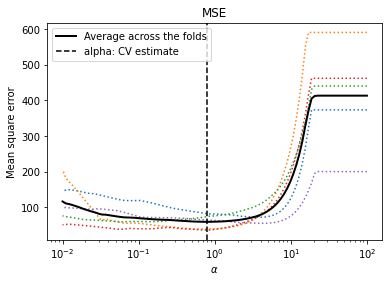

In [66]:
plt.semilogx(lassocv.alphas_, lassocv.mse_path_, linestyle=":")
plt.plot(
    lassocv.alphas_,
    lassocv.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lassocv.alpha_, linestyle="--", color="black", label="alpha: CV estimate")


plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
plt.title("MSE")
plt.show()

In [67]:
y_pred2=lasso.predict(scale(X3_test.values))
mse = round(mean_squared_error(y3_test, y_pred2),3)
print(f"MSE is {mse}")

MSE is 44.685


In [68]:
pred3=lasso.predict(scale(X3.values))
print(pred3)

[ 8.95489442  8.8629631   3.26374727  7.08161647 12.0221135   4.58392798
 19.70334298 11.35875833 22.22020549 25.24776985 22.62750407  9.648706
  3.43216984 35.55822608 42.33381054 26.85043659 17.81180281  3.61570766
 11.60242161 39.88277238 39.98219663 32.55687699 25.83766326 26.66014196
  7.99492904  8.26803394 34.84488594 31.22499707 38.37326413 17.76094298
 13.47153528 11.49776047  9.78667142 33.80800872 36.83720352 44.4291163
 36.73459949 46.3382913  20.58498593  7.82729716 27.50226403 38.99901529
 45.63249265 45.39390252 41.30983667 22.92897492 12.63325578 26.49227955
 43.35243237 53.31982813 21.91906512 31.8355682  22.99830903 21.91771094
 40.56122922 42.09207619 35.43728158 25.0152341  18.77045862 22.96024453
 33.53918542 35.19372522 24.58709407 48.1335436  34.9400878   8.43251896
  4.38751298 47.6525644  35.93963972 42.91535372 23.45544686 29.25299414
 36.64515351 25.56574455 68.5513087  69.94177854 30.95736484 52.2477777
 59.62718174 40.35191976 18.27702808 39.38808638 51.074

## Ridge Regression 

Text(0.5, 1.0, 'Ridge coefficients as a function of the regularization')

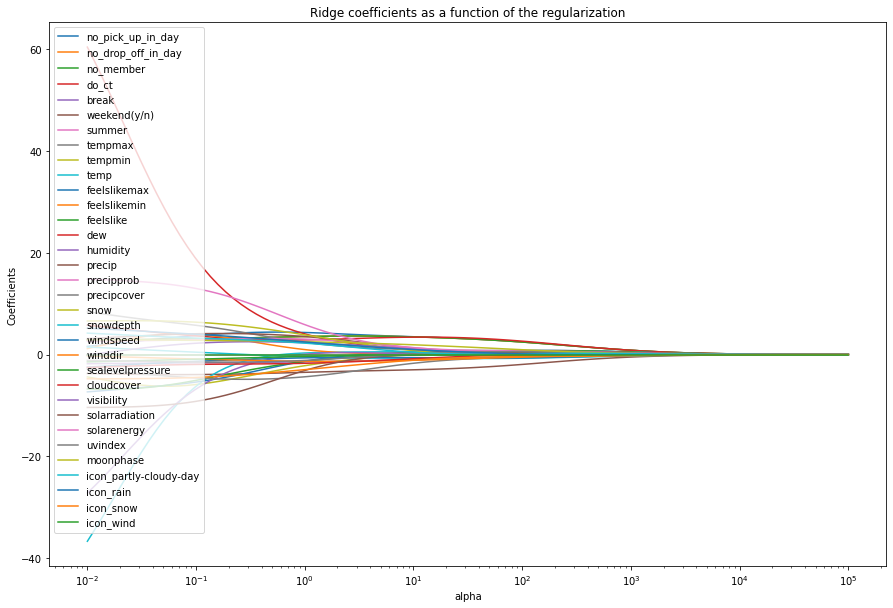

In [69]:
alphas = 10**np.linspace(-2,5,100)

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X3_train), y3_train)
    coefs.append(ridge.coef_)

plt.figure(figsize=(15, 10)) 
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.legend(list(X.columns), loc='best')

plt.title('Ridge coefficients as a function of the regularization')

In [70]:
# find the best alpha via CV with selected scoring metric
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X3_train), y3_train)

print('The best alpha from RidgeCV:', ridgecv.alpha_)

The best alpha from RidgeCV: 21.049041445120196


In [71]:
# with the best alpha
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(scale(X3_train), y3_train)
print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X3_train.columns))

The coefficients are:
pu_ct                     3.259604
no_pick_up_in_day         3.246641
no_drop_off_in_day        3.246641
no_member                 3.377827
break                    -0.860350
weekend(y/n)             -2.782278
summer                    0.000000
tempmax                   0.833206
tempmin                   0.268380
temp                      0.609819
feelslikemax              0.557967
feelslikemin              0.373937
feelslike                 0.401097
dew                       0.720661
humidity                 -0.051846
precip                    0.568967
precipprob                0.841003
precipcover              -1.090108
snow                      0.207294
snowdepth                -0.759190
windspeed                -0.666696
winddir                  -0.935296
sealevelpressure         -0.064454
cloudcover               -0.490629
visibility                0.730617
solarradiation            0.210652
solarenergy               0.956316
uvindex                   0.39015

In [72]:
y_pred2=ridge.predict(scale(X3_test.values))
mse = round(mean_squared_error(y3_test, y_pred2),3)
print(f"MSE is {mse}")

MSE is 48.782


## Elastic Net

In [73]:
ENcv = ElasticNetCV(alphas=None, cv=10, max_iter=10000) # default l1_ratio=0.5
ENcv.fit(scale(X3_train), y3_train)

print('The best alpha from ElasticNetCV:', ENcv.alpha_)

# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X3_train), y3_train)


EN=ElasticNet()
EN.set_params(alpha=ENcv.alpha_)
EN.fit(scale(X3_train), y3_train)

print('The coefficients are:')
print(pd.Series(EN.coef_.flatten(), index=X3_train.columns))

The best alpha from ElasticNetCV: 0.39747607429053955
The coefficients are:
pu_ct                     3.551737
no_pick_up_in_day         3.468923
no_drop_off_in_day        3.468676
no_member                 3.457132
break                    -0.561491
weekend(y/n)             -2.569467
summer                    0.000000
tempmax                   0.880058
tempmin                   0.093626
temp                      0.620196
feelslikemax              0.473916
feelslikemin              0.292267
feelslike                 0.304724
dew                       0.577986
humidity                 -0.000000
precip                    0.148800
precipprob                0.550388
precipcover              -0.692893
snow                      0.000000
snowdepth                -0.545752
windspeed                -0.410949
winddir                  -0.849771
sealevelpressure         -0.000000
cloudcover               -0.269793
visibility                0.450251
solarradiation            0.000000
solarenergy   

In [74]:
y_pred2 = EN.predict(scale(X3_test.values))
mse = round(mean_squared_error(y3_test, y_pred2),3)
print(f"MSE is {mse}")

MSE is 46.172


Based on the result, it is better to use linear regression from lasso as well.

## Linear Regression to predict for demand of dropoff in 21st St & Pennsylvania Ave NW station

In [75]:
linear_regressor = LinearRegression()
linear_regressor.fit(X4_train, y4_train) 
y_pred3 = linear_regressor.predict(X4_test)

In [76]:
print(pd.Series(linear_regressor.coef_.flatten(), index=X4_train.columns))

pu_ct                     5.772328e-01
no_pick_up_in_day         9.618922e-02
no_drop_off_in_day        9.618922e-02
no_member                 2.855641e-01
break                    -1.233458e-13
weekend(y/n)             -2.713486e+00
summer                    1.160183e-14
tempmax                   4.093095e-01
tempmin                   1.177536e+00
temp                     -2.641463e+00
feelslikemax              2.492253e-02
feelslikemin             -4.892228e-01
feelslike                 1.484989e+00
dew                      -5.496045e-03
humidity                 -8.151856e-02
precip                    9.530493e+00
precipprob                4.073270e-02
precipcover              -2.299536e-01
snow                      4.842866e+00
snowdepth                -9.516142e-02
windspeed                 2.867861e-01
winddir                  -7.602482e-03
sealevelpressure          1.669286e-01
cloudcover               -4.889608e-02
visibility               -7.690813e-01
solarradiation           

In [77]:
mse = round(mean_squared_error(y4_test, y_pred3),3)
print(f"MSE is {mse}")

MSE is 32.556


## LASSO

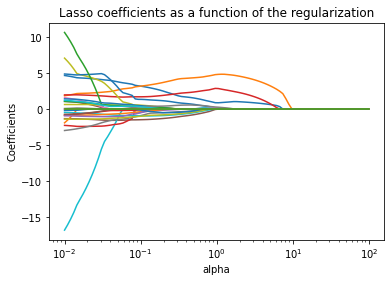

In [78]:
alphas = 10**np.linspace(-2,2,100)

lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a, max_iter=10000) # increase iterations for optimization of coefficients
    lasso.fit(scale(X4_train), y4_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
# plt.legend(list(X_train.columns), loc='best')

plt.title('Lasso coefficients as a function of the regularization');

In [79]:
# find the best alpha via CV with selected scoring metric
lassocv = LassoCV(alphas=alphas, max_iter=10000)
lassocv.fit(scale(X4_train), y4_train)

print('The best alpha from LassoCV:', lassocv.alpha_)

The best alpha from LassoCV: 0.25950242113997374


In [80]:
# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X4_train), y4_train)
print('The coefficients are:')
print(pd.Series(lasso.coef_.flatten(), index=X4_train.columns))

The coefficients are:
pu_ct                     2.116582e+00
no_pick_up_in_day         3.979484e+00
no_drop_off_in_day        8.963770e-14
no_member                 2.053895e+00
break                     0.000000e+00
weekend(y/n)             -1.171343e+00
summer                    0.000000e+00
tempmax                   0.000000e+00
tempmin                   0.000000e+00
temp                      0.000000e+00
feelslikemax              1.013025e+00
feelslikemin              0.000000e+00
feelslike                 0.000000e+00
dew                      -0.000000e+00
humidity                 -8.674263e-02
precip                   -0.000000e+00
precipprob               -0.000000e+00
precipcover              -4.261201e-01
snow                      1.122810e-01
snowdepth                -8.143925e-01
windspeed                 8.765914e-02
winddir                  -0.000000e+00
sealevelpressure          7.400124e-02
cloudcover               -0.000000e+00
visibility                0.000000e+00
sol

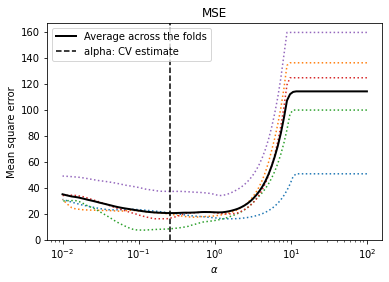

In [81]:
plt.semilogx(lassocv.alphas_, lassocv.mse_path_, linestyle=":")
plt.plot(
    lassocv.alphas_,
    lassocv.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lassocv.alpha_, linestyle="--", color="black", label="alpha: CV estimate")


plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
plt.title("MSE")
plt.show()

In [82]:
y_pred3=lasso.predict(scale(X4_test.values))
mse = round(mean_squared_error(y4_test, y_pred3),3)
print(f"MSE is {mse}")

MSE is 35.71


## Ridge Regression 

Text(0.5, 1.0, 'Ridge coefficients as a function of the regularization')

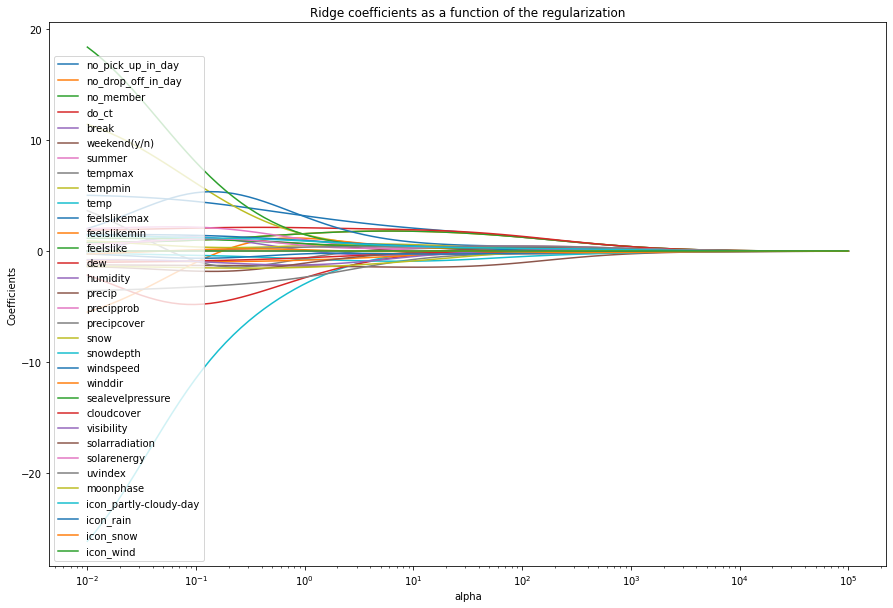

In [83]:
alphas = 10**np.linspace(-2,5,100)

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X4_train), y4_train)
    coefs.append(ridge.coef_)

plt.figure(figsize=(15, 10)) 
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.legend(list(X.columns), loc='best')

plt.title('Ridge coefficients as a function of the regularization')

In [84]:
# find the best alpha via CV with selected scoring metric
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X4_train), y4_train)

print('The best alpha from RidgeCV:', ridgecv.alpha_)

The best alpha from RidgeCV: 24.77076355991709


In [85]:
# with the best alpha
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(scale(X4_train), y4_train)
print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X4_train.columns))

The coefficients are:
pu_ct                     1.765315
no_pick_up_in_day         1.669048
no_drop_off_in_day        1.669048
no_member                 1.789131
break                     0.000000
weekend(y/n)             -1.396113
summer                    0.000000
tempmax                   0.311121
tempmin                   0.284145
temp                      0.090244
feelslikemax              0.572557
feelslikemin              0.245197
feelslike                 0.333637
dew                      -0.062705
humidity                 -0.271668
precip                   -0.089100
precipprob               -0.083210
precipcover              -0.407229
snow                      0.441765
snowdepth                -0.791081
windspeed                 0.330486
winddir                  -0.208048
sealevelpressure          0.320863
cloudcover               -0.075353
visibility               -0.172102
solarradiation            0.117262
solarenergy               0.398423
uvindex                   0.43004

In [86]:
y_pred3=ridge.predict(scale(X4_test.values))
mse = round(mean_squared_error(y4_test, y_pred3),3)
print(f"MSE is {mse}")

MSE is 31.304


## Elastic Net

In [87]:
ENcv = ElasticNetCV(alphas=None, cv=10, max_iter=10000) # default l1_ratio=0.5
ENcv.fit(scale(X4_train), y4_train)

print('The best alpha from ElasticNetCV:', ENcv.alpha_)

# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X4_train), y4_train)


EN=ElasticNet()
EN.set_params(alpha=ENcv.alpha_)
EN.fit(scale(X4_train), y4_train)

print('The coefficients are:')
print(pd.Series(EN.coef_.flatten(), index=X4_train.columns))

The best alpha from ElasticNetCV: 0.6707789371095119
The coefficients are:
pu_ct                     1.716757
no_pick_up_in_day         1.741567
no_drop_off_in_day        1.741220
no_member                 1.805564
break                     0.000000
weekend(y/n)             -1.141760
summer                    0.000000
tempmax                   0.303364
tempmin                   0.083888
temp                      0.000000
feelslikemax              0.558269
feelslikemin              0.000000
feelslike                 0.233850
dew                       0.000000
humidity                 -0.074274
precip                   -0.000000
precipprob               -0.000000
precipcover              -0.293578
snow                      0.000000
snowdepth                -0.536126
windspeed                 0.000000
winddir                  -0.000000
sealevelpressure          0.006386
cloudcover               -0.000000
visibility                0.000000
solarradiation            0.014115
solarenergy    

In [88]:
y_pred3 = EN.predict(scale(X4_test.values))
mse = round(mean_squared_error(y4_test, y_pred3),3)
print(f"MSE is {mse}")

MSE is 31.062


In [89]:
pred4=EN.predict(scale(X4.values))
print(pred4)

[ 5.35084281  5.88986337  9.44025796  5.08849032 11.17952945 13.37378997
 12.04531023 15.61248457 12.4330687   3.14282512  7.39045    13.46731187
 19.30675659 13.71088041 13.49956016  6.3793682  12.84701148 17.96620937
 13.95385156 21.85258495  9.67176025  7.05317388  5.72820634 12.89130118
 15.86402778 14.78992852 11.59771711  7.15657885  7.10946733  9.18101237
 17.38559467 20.20926241 19.65011398 21.08965569 11.51097705  3.37321398
 13.65811913 17.84393164 14.27036374 18.17791176 16.97168075 10.25404004
  9.58187008 20.65429338 12.24773437 23.73308706 12.219459   19.044189
 13.45985364 17.99627187 22.13597749 36.45365638 30.73910925 17.85651731
 11.43788943 16.45758912 22.86194145 21.29621088 11.49394514 19.85322908
 19.70903192  5.16341101 28.79046394 27.80372973 32.83619609 14.96823498
 20.31480025 13.20989945 12.29288501 23.63654705 27.0472651  13.8167088
 27.10777843 34.32182961 17.7190357  18.35389204 26.01558517 27.96170358
 17.60663155 32.75863251 24.50974195 20.55387462 32.93

Based on the result, it is better to use linear regression from Elastic Net.

## Prediction 

### Get the get predicted values from the models above

- pick up and drop off at 21st & I St NW' and '21st St & Pennsylvania Ave NW on April 30.

In [100]:
predicted_pickup1 = 36.91053556
predicted_pickup2 = 9.96538455
predicted_droppout1 = 40.59737547
predicted_droppout2 = 15.19155828